In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')

11490434/11490434 [==============================] - 48s 4us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

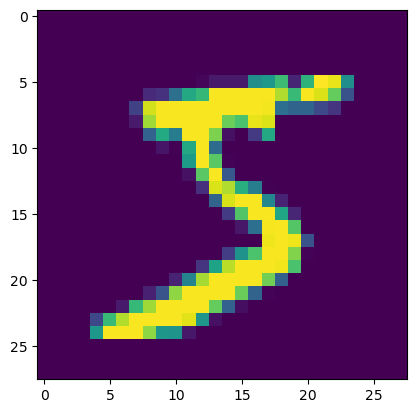

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

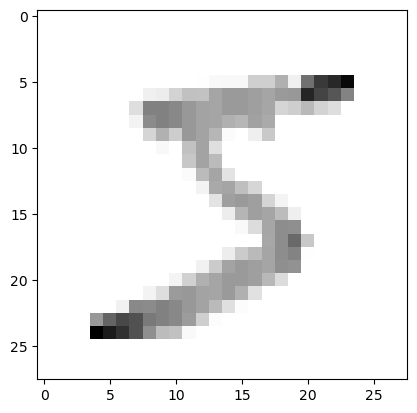

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
import numpy as np
i=28
x_trainr=np.array(x_train).reshape(-1,i,i,1)
x_testr=np.array(x_test).reshape(-1,i,i,1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [15]:
print("Total Training Samples=",len(x_trainr))

Total Training Samples= 60000


In [16]:
from keras.api._v2.keras import metrics
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [17]:
hist=model.fit(x_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2231 - accuracy: 0.9320 - val_loss: 0.0818 - val_accuracy: 0.9768
Epoch 2/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0675 - accuracy: 0.9791 - val_loss: 0.0651 - val_accuracy: 0.9808
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0471 - accuracy: 0.9849 - val_loss: 0.0485 - val_accuracy: 0.9864
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0634 - val_accuracy: 0.9820
Epoch 5/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0280 - accuracy: 0.9907 - val_loss: 0.0444 - val_accuracy: 0.9878
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0480 - val_accuracy: 0.9862
Epoch 7/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0468 -

In [18]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
hist.history

{'loss': [0.22309918701648712,
  0.06748141348361969,
  0.047074057161808014,
  0.035254333168268204,
  0.02796047553420067,
  0.022244689986109734,
  0.01805207133293152,
  0.014040401205420494,
  0.012550058774650097,
  0.010285857133567333],
 'accuracy': [0.9319999814033508,
  0.9791250228881836,
  0.9849166870117188,
  0.9887916445732117,
  0.9907291531562805,
  0.9930208325386047,
  0.9943125247955322,
  0.995395839214325,
  0.9958958625793457,
  0.9966458082199097],
 'val_loss': [0.08182143419981003,
  0.06506337970495224,
  0.048530463129282,
  0.06336528807878494,
  0.04435601830482483,
  0.04804585129022598,
  0.04677162691950798,
  0.0464060939848423,
  0.049194782972335815,
  0.05493240803480148],
 'val_accuracy': [0.9768333435058594,
  0.9807500243186951,
  0.9864166378974915,
  0.9819999933242798,
  0.9878333210945129,
  0.9861666560173035,
  0.9859166741371155,
  0.987333357334137,
  0.9880833625793457,
  0.9869166612625122]}

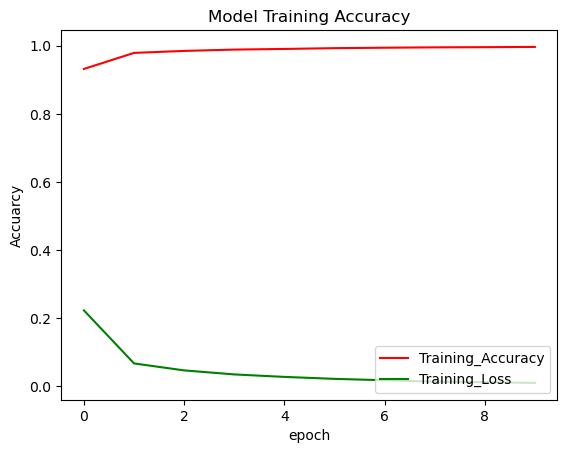

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],'-r',label='Training_Accuracy')
plt.plot(hist.history['loss'],'-g',label='Training_Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()